In [3]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [4]:
data = pd.read_csv("Global Water Usage Statistics.csv")
data

,Country,"Yearly Water Used (m³, thouand of liters)",Daily Water Used Per Capita (liters),Population
0,Afghanistan,"20,280,000,000","2,843","19,542,982"
1,Albania,"1,311,000,000","1,196","3,003,387"
2,Algeria,"9,978,000,000",678,"40,339,329"
3,Angola,"705,800,000",99,"19,450,959"
4,Antigua and Barbuda,"11,500,000",359,"87,674"
...,...,...,...,...
174,Venezuela,"22,630,000,000","2,252","27,525,097"
175,Vietnam,"82,030,000,000","2,703","83,142,095"
176,Yemen,"3,565,000,000",458,"21,320,671"
177,Zambia,"1,572,000,000",410,"10,508,294"


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 4 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Country                                     179 non-null    object
 1   Yearly  Water Used (m³, thouand of liters)  179 non-null    object
 2   Daily Water Used Per Capita (liters)        179 non-null    object
 3   Population                                  179 non-null    object
dtypes: object(4)
memory usage: 5.7+ KB


In [6]:
def clean_numeric_column(column):
    return column.str.replace(',', '').astype(float)

columns_to_clean = ['Yearly  Water Used (m³, thouand of liters)', 'Daily Water Used Per Capita (liters)', 'Population']
data[columns_to_clean] = data[columns_to_clean].apply(clean_numeric_column)

In [7]:
missing_values = data.isnull().sum()
print("Missing values per column:")
print(missing_values)


Missing values per column:
Country                                       0
Yearly  Water Used (m³, thouand of liters)    0
Daily Water Used Per Capita (liters)          0
Population                                    0
dtype: int64


In [8]:
data.rename(columns={
    'Yearly  Water Used (m³, thouand of liters)': 'Yearly_Water_Used',
    'Daily Water Used Per Capita (liters)': 'Daily_Water_Used',
    'Population': 'Population'
}, inplace=True)

In [9]:
data['Yearly_Water_Used_Per_Capita'] = data['Yearly_Water_Used'] / data['Population']
data['Daily_Water_Usage_Percentage'] = (data['Daily_Water_Used'] * 365) / data['Yearly_Water_Used']

In [10]:
data.describe()

,Yearly_Water_Used,Daily_Water_Used,Population,Yearly_Water_Used_Per_Capita,Daily_Water_Usage_Percentage
count,1.790000e+02,179.000000,1.790000e+02,179.000000,1.790000e+02
mean,2.232826e+10,1335.402235,3.913985e+07,487.422625,9.920510e-04
std,8.243167e+10,1587.623316,1.437784e+08,579.479799,3.355830e-03
min,5.000000e+06,33.000000,3.240100e+04,12.088365,7.176726e-07
25%,4.987000e+08,355.000000,2.827309e+06,129.706737,3.814434e-05
50%,2.088000e+09,844.000000,8.362829e+06,308.159196,1.195762e-04
75%,1.056500e+10,1928.500000,2.622125e+07,703.877474,3.537769e-04
max,7.610000e+11,15888.000000,1.393715e+09,5799.005434,3.087900e-02


In [11]:
duplicate1 = data.duplicated()
duplicate1.sum()

0

In [12]:

numerical_columns = ['Yearly_Water_Used', 'Daily_Water_Used', 'Population', 'Yearly_Water_Used_Per_Capita', 'Daily_Water_Usage_Percentage']


<Figure size 1500x1000 with 0 Axes>

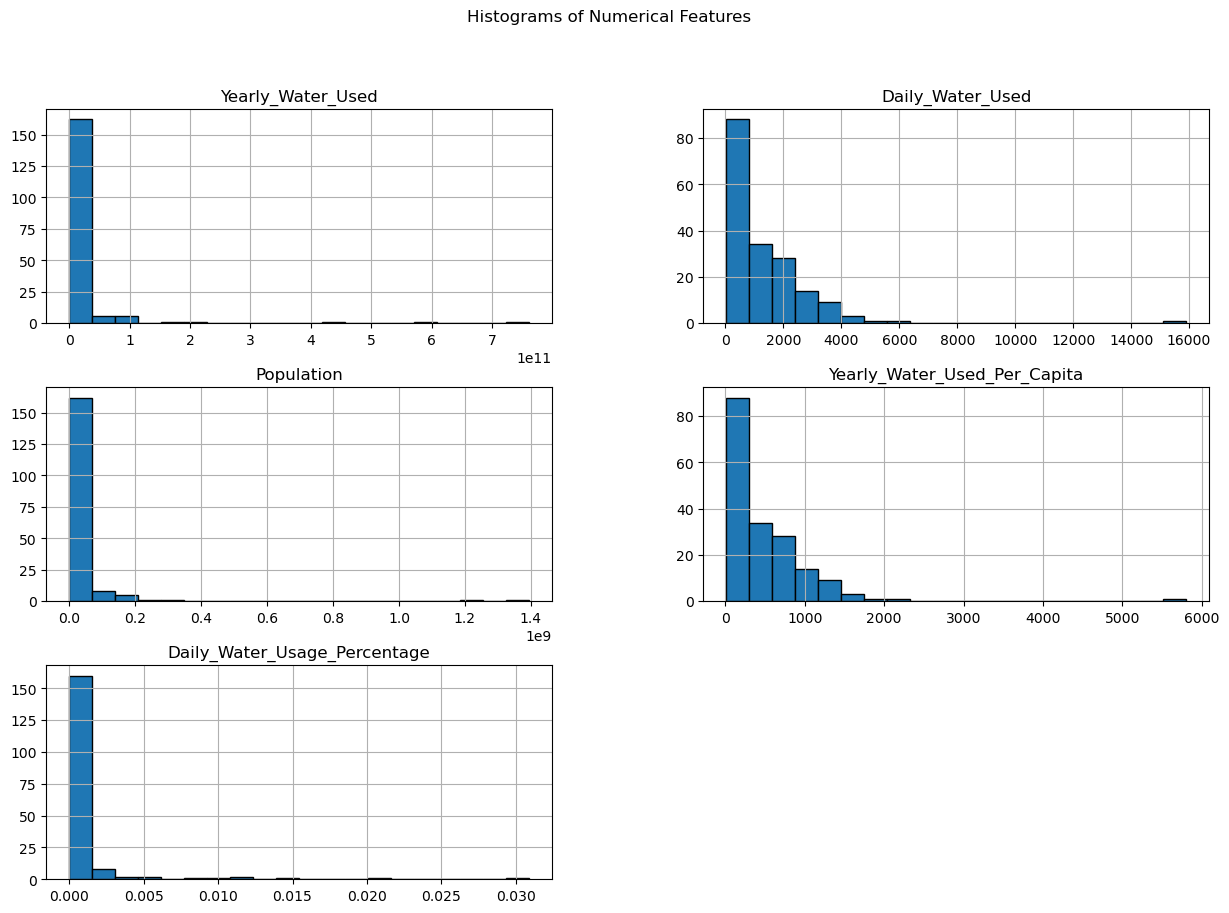

In [13]:
# Visualize basic data distributions
plt.figure(figsize=(15, 10))
data[numerical_columns].hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle("Histograms of Numerical Features")
plt.show()




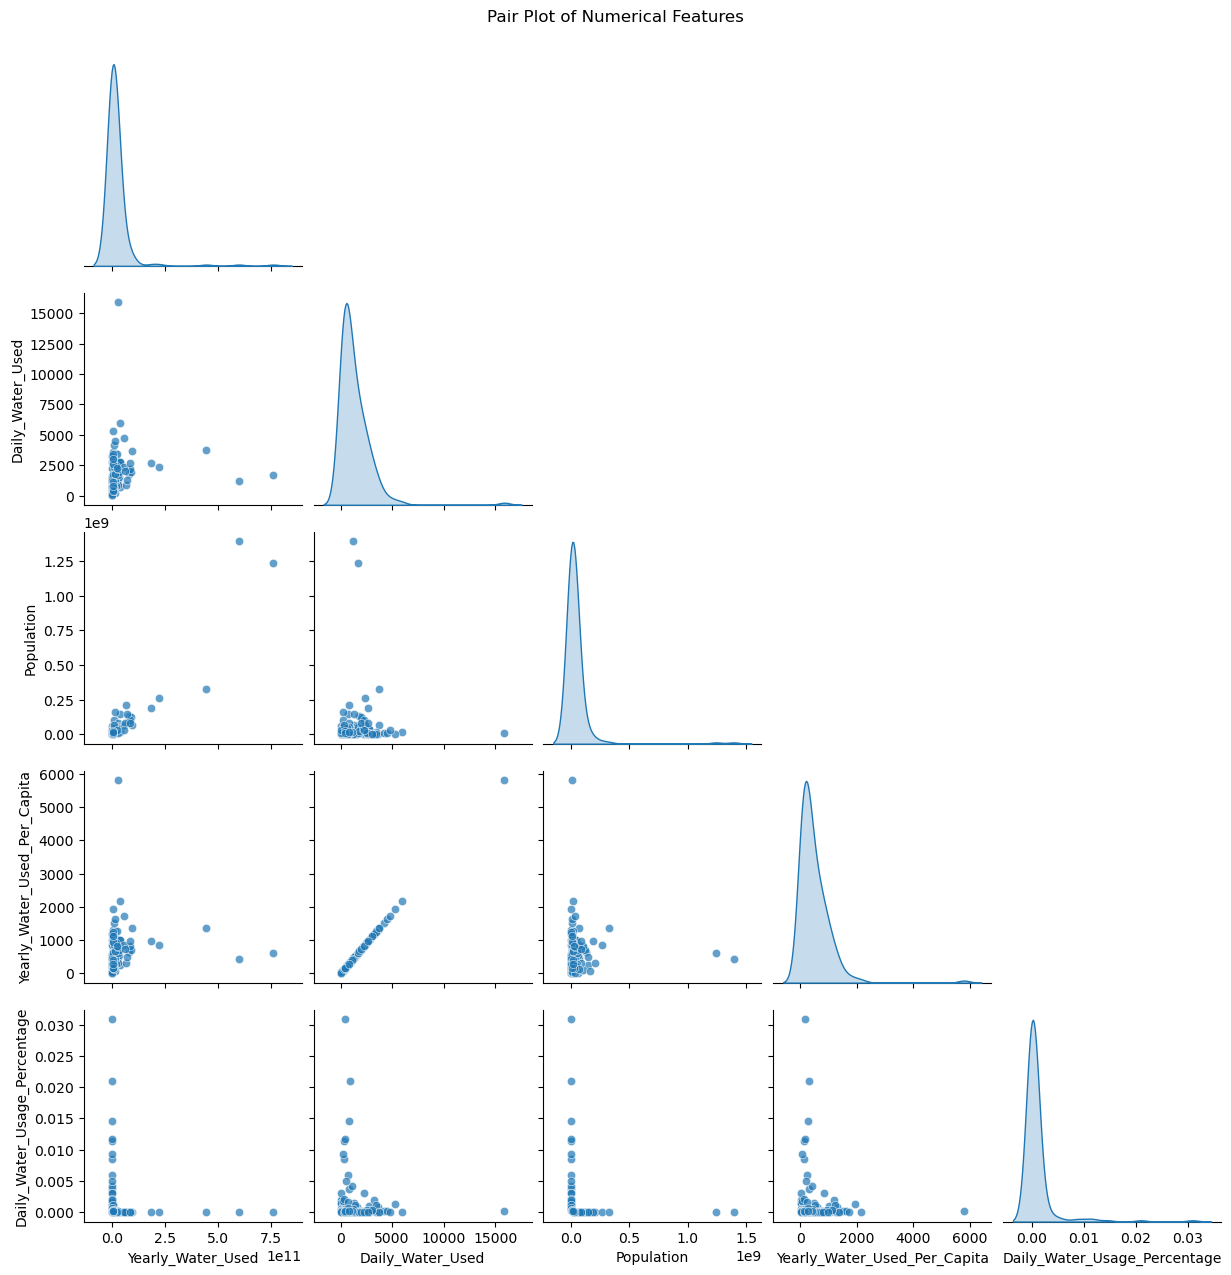

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns for the pair plot
numeric_data = data.select_dtypes(include=['number'])

# Create the pair plot
sns.pairplot(numeric_data, diag_kind='kde', corner=True, plot_kws={'alpha': 0.7})
plt.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.show()


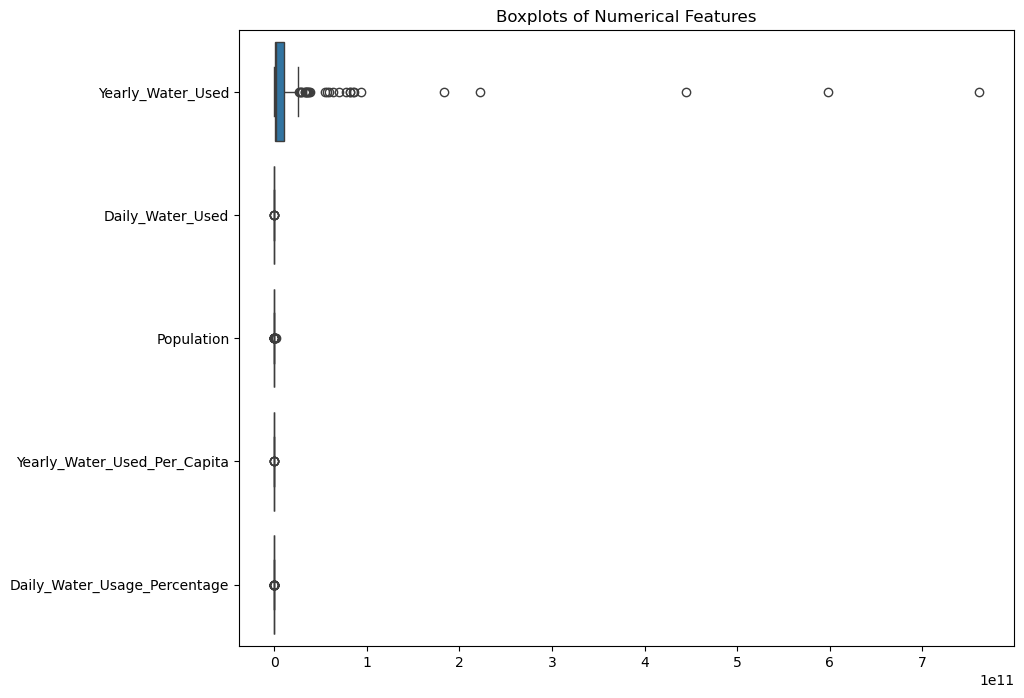

In [14]:
# Boxplots for outlier detection
plt.figure(figsize=(10, 8))
sns.boxplot(data=data[numerical_columns], orient='h')
plt.title("Boxplots of Numerical Features")
plt.show()

In [15]:
# Example: Encoding 'Country' (replace 'Country' with your actual column if needed)
if 'Country' in data.columns:
    data_encoded = pd.get_dummies(data, columns=['Country'], drop_first=True)
else:
    data_encoded = data  # No categorical variables found

# Display the dataset after feature engineering
print("Dataset After Feature Engineering:")
print(data_encoded.head())

Dataset After Feature Engineering:
   Yearly_Water_Used  Daily_Water_Used  Population  \
0       2.028000e+10            2843.0  19542982.0   
1       1.311000e+09            1196.0   3003387.0   
2       9.978000e+09             678.0  40339329.0   
3       7.058000e+08              99.0  19450959.0   
4       1.150000e+07             359.0     87674.0   

   Yearly_Water_Used_Per_Capita  Daily_Water_Usage_Percentage  \
0                   1037.712668                      0.000051   
1                    436.507183                      0.000333   
2                    247.351660                      0.000025   
3                     36.286129                      0.000051   
4                    131.167735                      0.011394   

   Country_Albania  Country_Algeria  Country_Angola  \
0            False            False           False   
1             True            False           False   
2            False             True           False   
3            False           

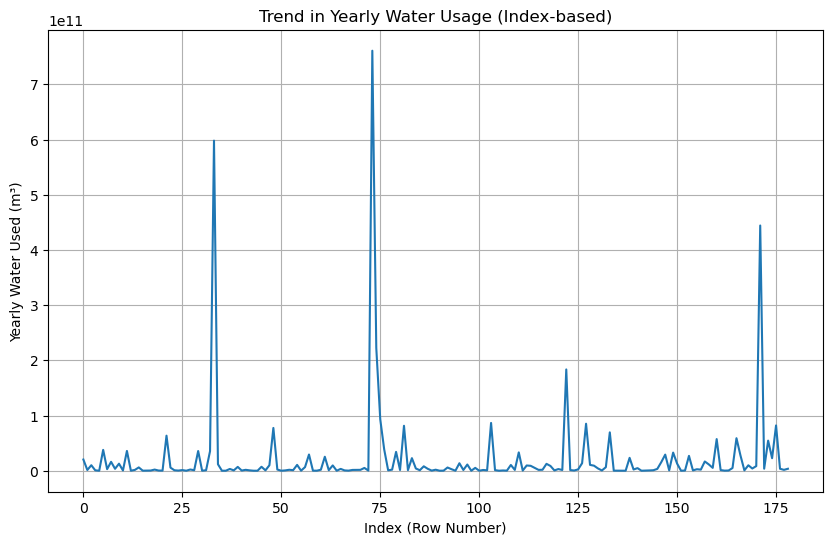

In [16]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(len(data)), y='Yearly_Water_Used', data=data)
plt.title("Trend in Yearly Water Usage (Index-based)")
plt.xlabel("Index (Row Number)")
plt.ylabel("Yearly Water Used (m³)")
plt.grid(True)
plt.show()


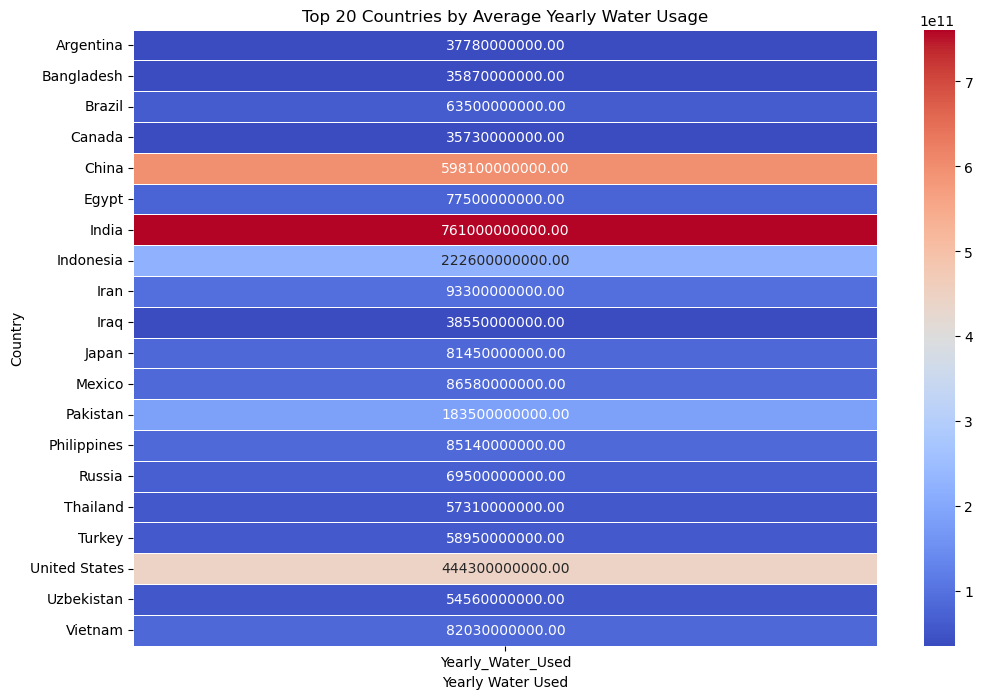

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group by country and calculate the mean of 'Yearly_Water_Used'
top_countries = data.groupby('Country')['Yearly_Water_Used'].mean().nlargest(20).index

# Filter the data to include only the top 20 countries
filtered_data = data[data['Country'].isin(top_countries)]

# Create a pivot table for heatmap
heatmap_data = filtered_data.pivot_table(values='Yearly_Water_Used', index='Country', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title("Top 20 Countries by Average Yearly Water Usage")
plt.xlabel("Yearly Water Used")
plt.ylabel("Country")
plt.show()


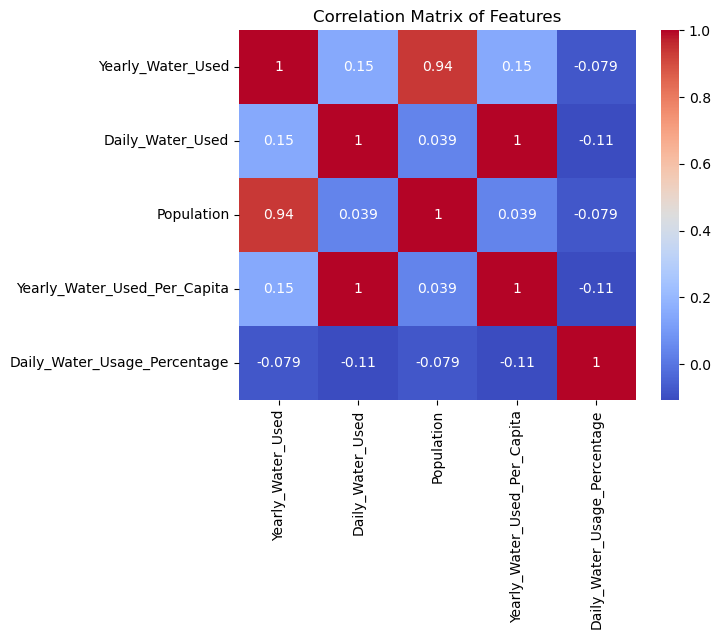

In [29]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Features")
plt.show()


In [18]:
# Example feature and target columns
from sklearn.model_selection import train_test_split
if 'Yearly_Water_Used' in data.columns:
    X = data.drop(columns=['Yearly_Water_Used'])  # Drop target column
    y = data['Yearly_Water_Used']

    # Split the data (80-20 split)
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

    # Display the shapes of the splits
    print("Training Features Shape:", X_train.shape)
    print("Testing Features Shape:", X_test.shape)
    print("Training Target Shape:", y_train.shape)
    print("Testing Target Shape:", y_test.shape)
else:
    print("'Yearly_Water_Used' column not found for splitting.")

Training Features Shape: (143, 5)
Testing Features Shape: (36, 5)
Training Target Shape: (143,)
Testing Target Shape: (36,)


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
# Ensure all features are numeric
X = pd.get_dummies(X, drop_first=True)

# Re-split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 # Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions and Metrics
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Metrics:")
print(f"Mean Squared Error (MSE): {mse_lr}")
print(f"R² Score: {r2_lr}")


Linear Regression Metrics:
Mean Squared Error (MSE): 1.9378063513949356e+20
R² Score: 0.8059770475484391


In [21]:
# --------------------------------
# Model 1: Linear Regression
# --------------------------------
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions and Metrics
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Metrics:")
print(f"Mean Squared Error (MSE): {mse_lr}")
print(f"R² Score: {r2_lr}")

Linear Regression Metrics:
Mean Squared Error (MSE): 1.9378063513949356e+20
R² Score: 0.8059770475484391


In [22]:
# --------------------------------
# Model 2: Random Forest Regressor
# --------------------------------
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and Metrics
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Metrics:")
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"R² Score: {r2_rf}")


Random Forest Metrics:
Mean Squared Error (MSE): 3.053782827709935e+20
R² Score: 0.6942398501523943


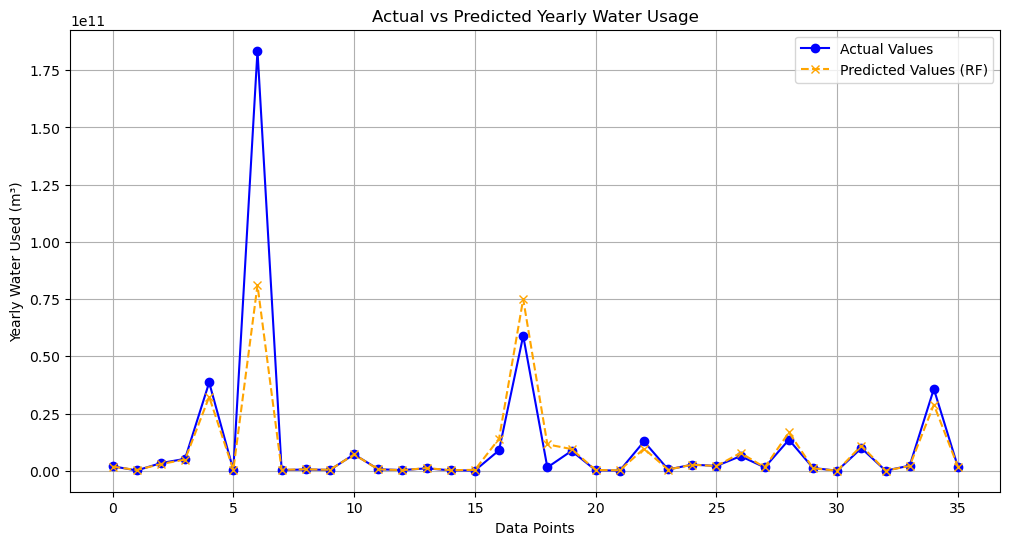

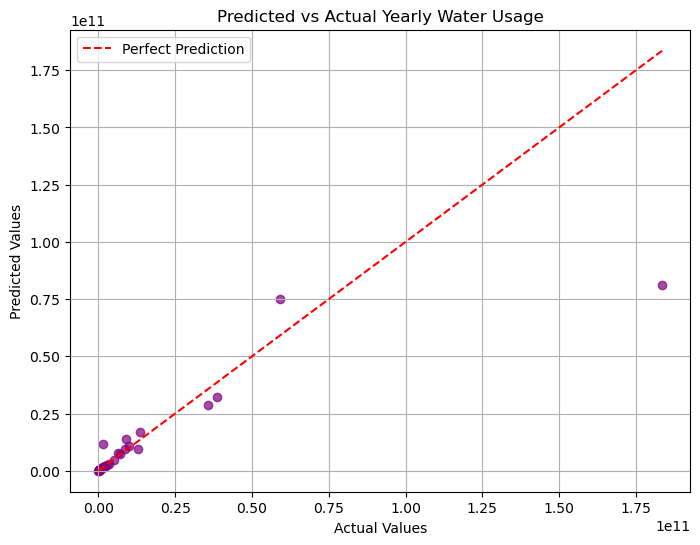

In [23]:
import matplotlib.pyplot as plt

# Predictions on the test dataset (Using Random Forest as an example, replace with Linear Regression if needed)
y_test_pred_rf = rf_model.predict(X_test)

# 1. Visualization: Actual vs Predicted Values (Line Chart)
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, label='Actual Values', marker='o', linestyle='-', color='blue')
plt.plot(range(len(y_test_pred_rf)), y_test_pred_rf, label='Predicted Values (RF)', marker='x', linestyle='--', color='orange')
plt.title("Actual vs Predicted Yearly Water Usage")
plt.xlabel("Data Points")
plt.ylabel("Yearly Water Used (m³)")
plt.legend()
plt.grid(True)
plt.show()

# 2. Scatter Plot: Predicted vs Actual Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred_rf, alpha=0.7, color='purple')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title("Predicted vs Actual Yearly Water Usage")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid(True)
plt.show()


Anomalous Data Points:
     Daily_Water_Used   Population  Yearly_Water_Used_Per_Capita  \
122            2704.0  185931955.0                    986.920188   

     Daily_Water_Usage_Percentage  Country_Albania  Country_Algeria  \
122                      0.000005            False            False   

     Country_Angola  Country_Antigua and Barbuda  Country_Argentina  \
122           False                        False              False   

     Country_Armenia  ...  Country_United Arab Emirates  \
122            False  ...                         False   

     Country_United Kingdom  Country_United States  Country_Uruguay  \
122                   False                  False            False   

     Country_Uzbekistan  Country_Venezuela  Country_Vietnam  Country_Yemen  \
122               False              False            False          False   

     Country_Zambia  Country_Zimbabwe  
122           False             False  

[1 rows x 182 columns]


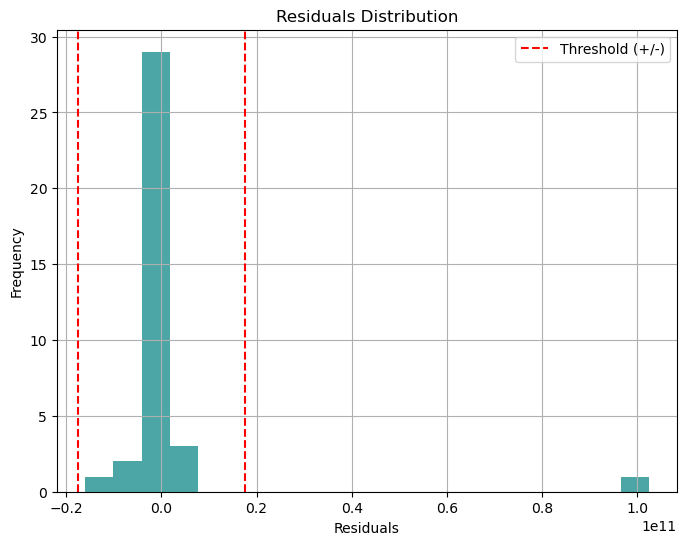

In [24]:
# Calculate residuals (difference between actual and predicted values)
residuals = y_test - y_test_pred_rf

# Threshold for anomalies (e.g., absolute residuals > 1 standard deviation)
threshold = residuals.std()

# Identify anomalies
anomalies = X_test[abs(residuals) > threshold]
print("Anomalous Data Points:")
print(anomalies)

# Highlight residuals on a histogram
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, alpha=0.7, color='teal')
plt.axvline(threshold, color='red', linestyle='--', label='Threshold (+/-)')
plt.axvline(-threshold, color='red', linestyle='--')
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


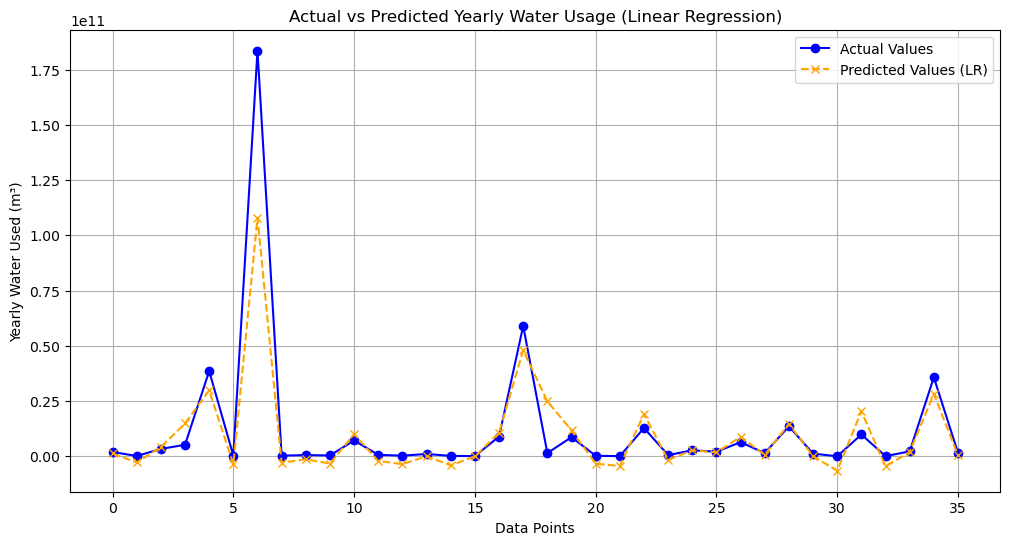

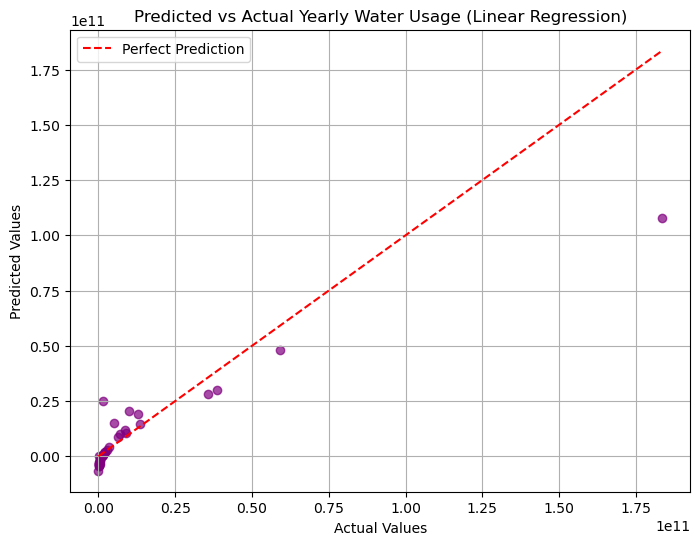

In [25]:
import matplotlib.pyplot as plt

# Predictions on the test dataset using Linear Regression
y_test_pred_lr = lr_model.predict(X_test)

# 1. Visualization: Actual vs Predicted Values (Line Chart)
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, label='Actual Values', marker='o', linestyle='-', color='blue')
plt.plot(range(len(y_test_pred_lr)), y_test_pred_lr, label='Predicted Values (LR)', marker='x', linestyle='--', color='orange')
plt.title("Actual vs Predicted Yearly Water Usage (Linear Regression)")
plt.xlabel("Data Points")
plt.ylabel("Yearly Water Used (m³)")
plt.legend()
plt.grid(True)
plt.show()

# 2. Scatter Plot: Predicted vs Actual Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred_lr, alpha=0.7, color='purple')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title("Predicted vs Actual Yearly Water Usage (Linear Regression)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid(True)
plt.show()
